In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [3]:
pop = np.loadtxt('pop_new.csv')

In [45]:
R0 = 2.1
r = 0.23
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
f1 = gzip.GzipFile(file_name1, "r")
x =  np.load(f1)

In [35]:
avg_i = np.mean(x,axis=0)

In [6]:
avg_std = np.std(x,axis=0)

In [130]:
avg_std[1858,-1]

1379.6469144879068

Text(0, 0.5, 'log(daily new infections)_std_inference')

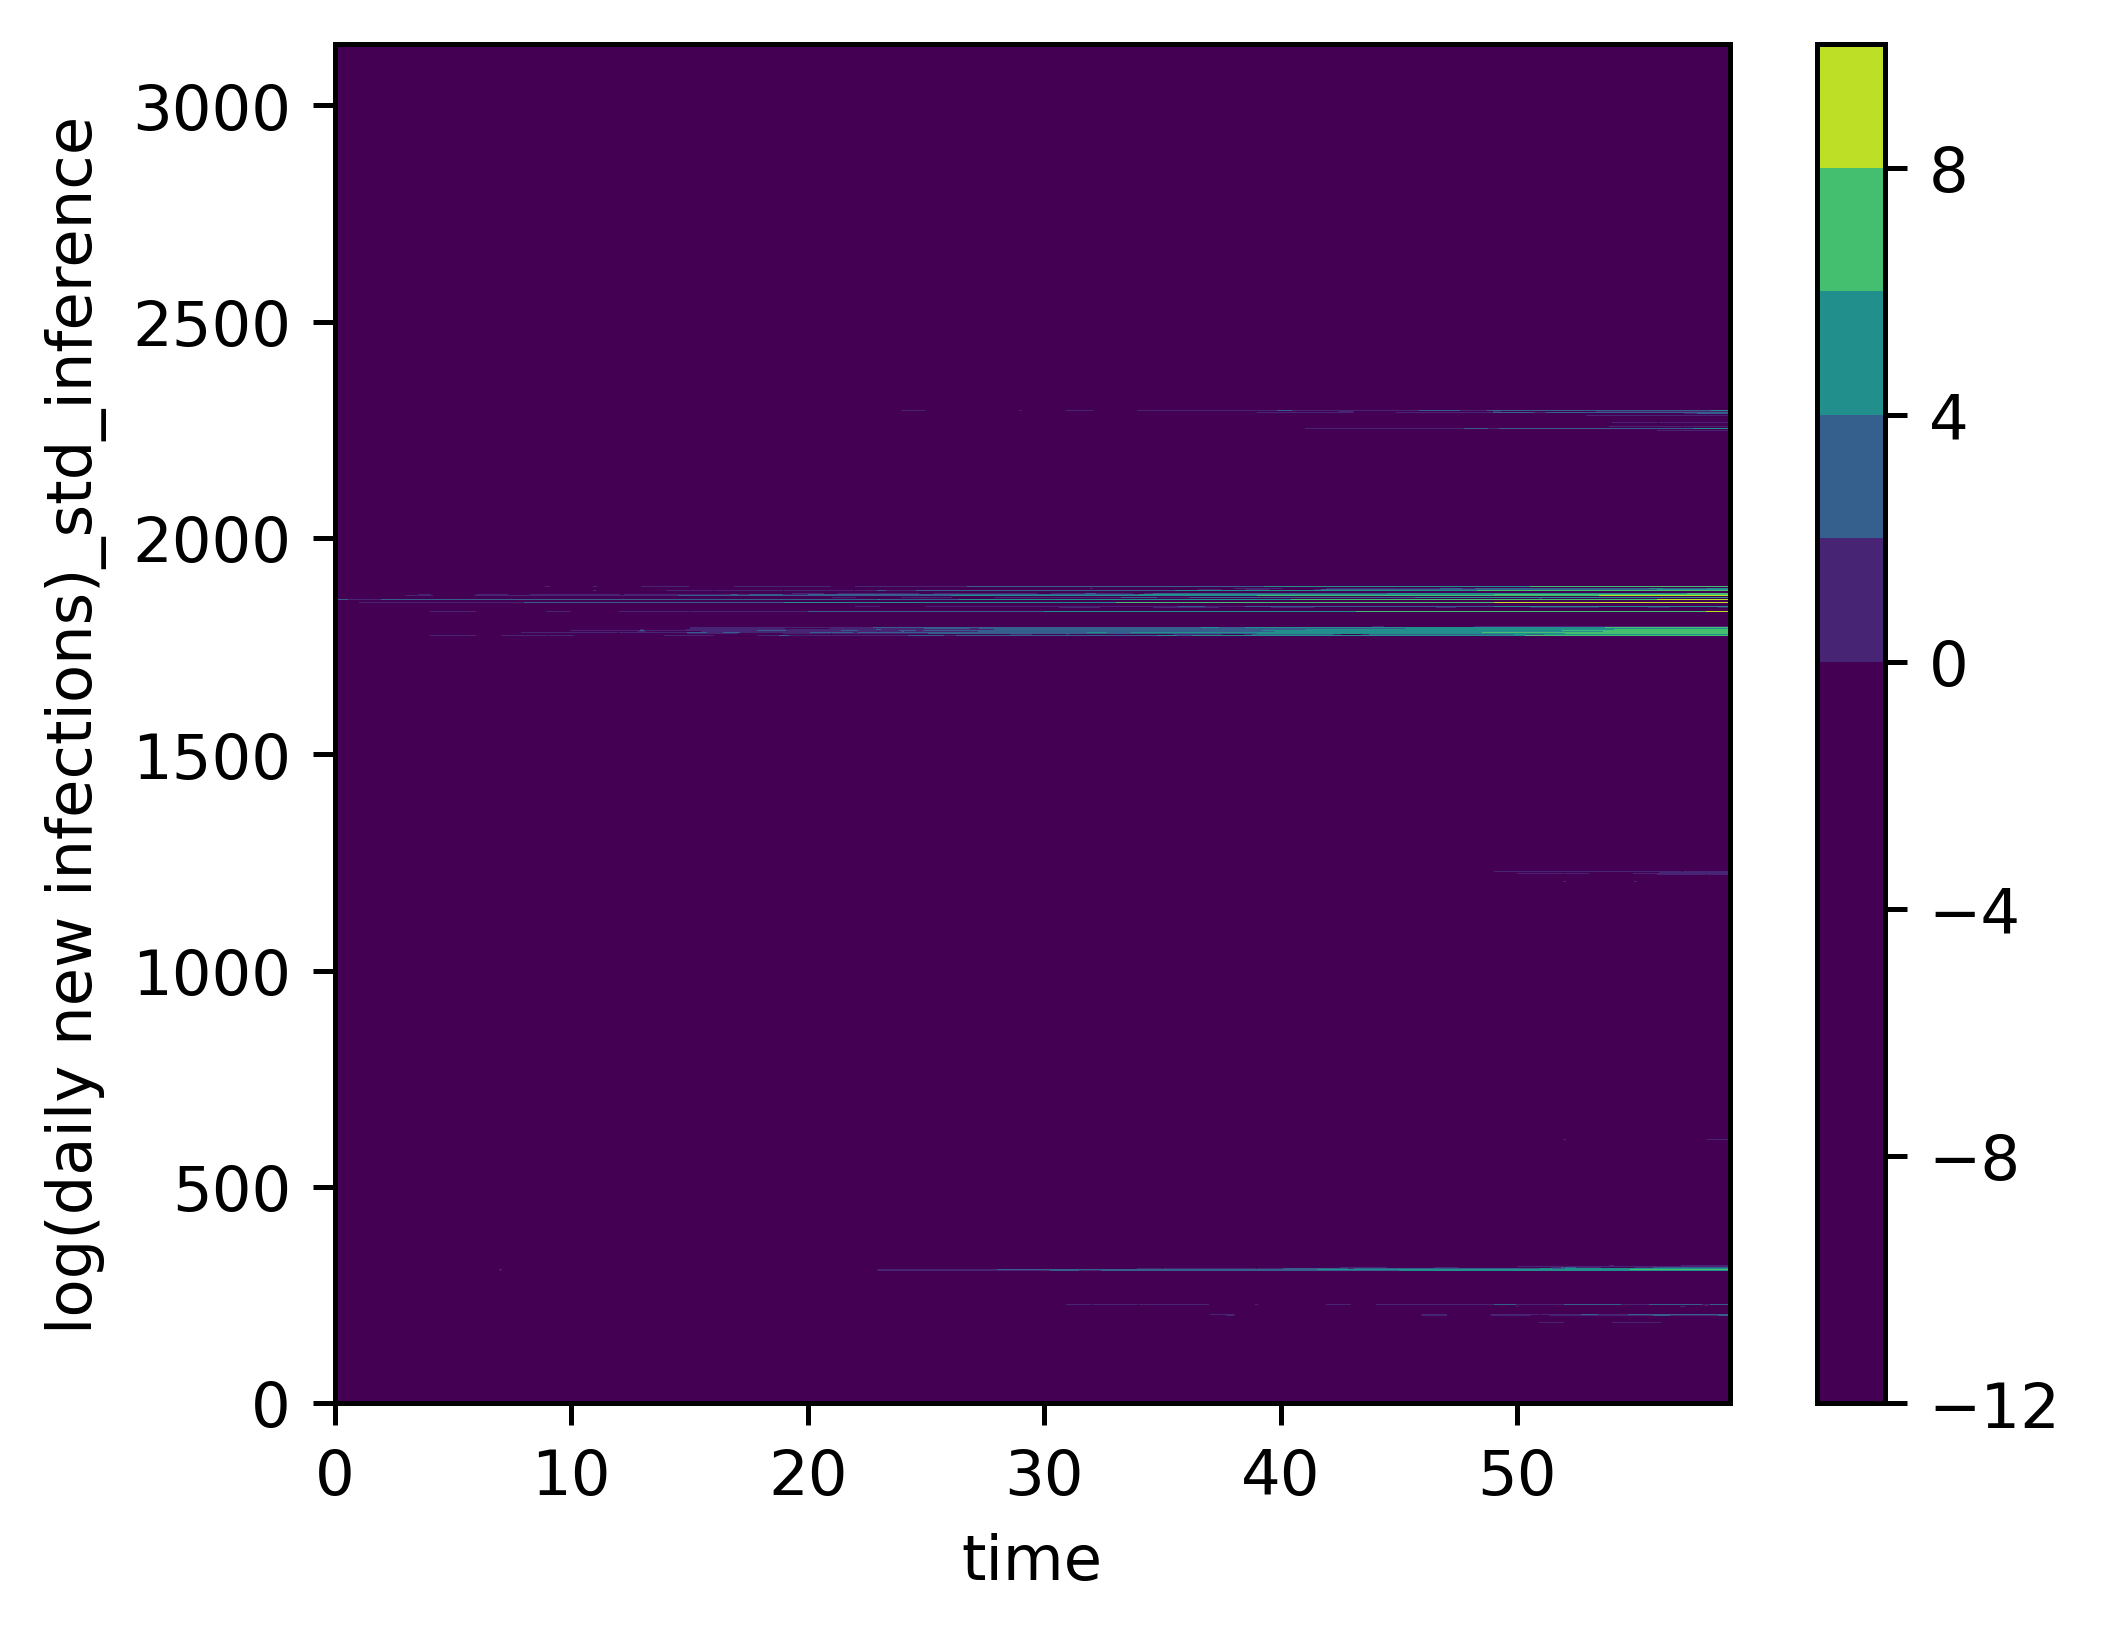

In [84]:
x = np.array(range(60))
y = np.array(range(3142))

X, Y = np.meshgrid(x, y)

# avg_i[avg_i == 0] = 0.00001
# Z = np.log(avg_i)
# Z = avg_std
Z = observed_ts
# Z = g_i[:,30:]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.viridis,vmin=0.00001) #vmax=36

# contour = ax2.imshow(Z,cmap=plt.cm.coolwarm)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('log(daily new infections)_std_inference')

In [47]:
x[x==0] = 0.00001

In [48]:
log_all = np.log(x)

In [38]:
log_avg_i = np.mean(log_all,axis=0)

In [49]:
# log_std_i = np.std(log_all, axis=0)

In [54]:
variance = (log_avg_i*0.2)**2 + 6

In [55]:
variance[log_avg_i<0] = 0

In [56]:
std_new = np.sqrt(variance)

In [58]:
rs = np.arange(0.01, 1, 0.02)
rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
rs = rs[rs_selected]

In [79]:
rs

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.51, 0.99])

In [67]:
Inference_mean = np.zeros((9,3142,60))
Inference_std = np.zeros((9,3142,60))
Observation_i = np.zeros((9,3142,60))

In [116]:
(10)**2

100

In [131]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for r_idx in range(9):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
    f1 = gzip.GzipFile(file_name1, "r")
    x =  np.load(f1)
    
    avg_i = np.mean(x,axis=0)
    variance = (avg_i)**2*0.1 + 100
    std_new = np.sqrt(variance)
    
    Inference_mean[r_idx,:] = avg_i
    Inference_std[r_idx,:] = std_new
    
    obser_ts = x[0,:,:] ## take the log
    Observation_i[r_idx,:] = obser_ts

0
1
2
3
4
5
6
7
8


In [132]:
# R_loglikelihood_range = np.zeros((9,9)) ### different ranges
for i in range(1):
    observed_ts = Observation_i[i]
    for r_idx in range(9):
        print(r_idx)
        mean_r = Inference_mean[r_idx]
        std_r = Inference_std[r_idx]
    #     std_r_ma = mean_county_r*0.1+1
        R_loglikelihood_range[i,r_idx] = LE(observed_ts,mean_county_r,std_r)

0
1


KeyboardInterrupt: 

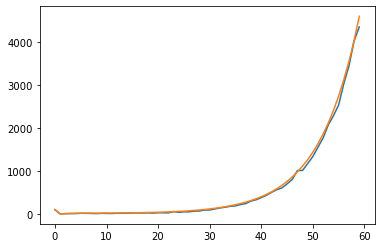

In [126]:
plt.plot(Observation_i[0,1858])
plt.plot(Inference_mean[0,1858,:])

In [133]:
Inference_std[0,1858,:]

array([  33.1662479 ,   10.00179984,   10.12452486,   10.59753196,
         11.14445663,   11.5040178 ,   11.56643592,   11.56294151,
         11.48966346,   11.64669223,   11.75671085,   11.90230962,
         12.02871398,   12.31967741,   12.56842781,   12.90356906,
         13.27729039,   13.72932447,   14.389574  ,   15.17442738,
         15.79282025,   16.94375553,   18.18800089,   19.47485485,
         21.06587626,   22.70539461,   25.16156632,   27.84165984,
         30.78036247,   34.39256257,   38.07291544,   42.90289076,
         47.93172712,   53.90882141,   60.88606226,   68.61345128,
         77.63867651,   87.327738  ,   99.12638496,  112.02124691,
        127.13481982,  144.37267834,  163.57372185,  186.09885043,
        211.39963944,  240.06586222,  272.96257268,  310.21938046,
        353.13908141,  400.46859253,  455.87106374,  518.30903598,
        589.95326489,  670.83537186,  764.19820466,  869.30819686,
        989.69543492, 1124.85080355, 1281.11628898, 1457.58752

In [134]:
SSA.norm.pdf(Observation_i[0,1858],loc=Inference_mean[0,1858,:],scale=Inference_std[0,1858,:])

array([0.01202856, 0.03985516, 0.03771778, 0.03691707, 0.03010951,
       0.0335313 , 0.03210492, 0.02966116, 0.02396881, 0.03137504,
       0.02761035, 0.02286156, 0.02911469, 0.02656374, 0.02582093,
       0.0302039 , 0.02828192, 0.02478016, 0.02400824, 0.01498289,
       0.02011995, 0.01486185, 0.00915589, 0.0202181 , 0.01117777,
       0.01393418, 0.01005497, 0.01184809, 0.00954999, 0.010908  ,
       0.00842149, 0.00867903, 0.00820111, 0.00726085, 0.00642782,
       0.00539166, 0.00488946, 0.00426561, 0.00399585, 0.00348813,
       0.00309627, 0.0027357 , 0.00243203, 0.0021279 , 0.0018108 ,
       0.00161482, 0.0014271 , 0.00127938, 0.0010833 , 0.0009708 ,
       0.0008538 , 0.00076065, 0.00066817, 0.00059347, 0.00051517,
       0.00044599, 0.00040138, 0.00035312, 0.00031138, 0.00026976])

In [122]:
SSA.norm.pdf(Observation_i[0,0],loc=Inference_mean[0,0,:],scale=Inference_std[0,0,:])

array([0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423,
       0.03989423, 0.03989423, 0.03989423, 0.03989423, 0.03989423])

In [115]:
np.log(0.00797885)

-4.830960988180992

In [ ]:
np.log(0.00797885)

[Text(0, 0, '0.01'),
 Text(1, 0, '0.03'),
 Text(2, 0, '0.05'),
 Text(3, 0, '0.07'),
 Text(4, 0, '0.09'),
 Text(5, 0, '0.11'),
 Text(6, 0, '0.13'),
 Text(7, 0, '0.51'),
 Text(8, 0, '0.99')]

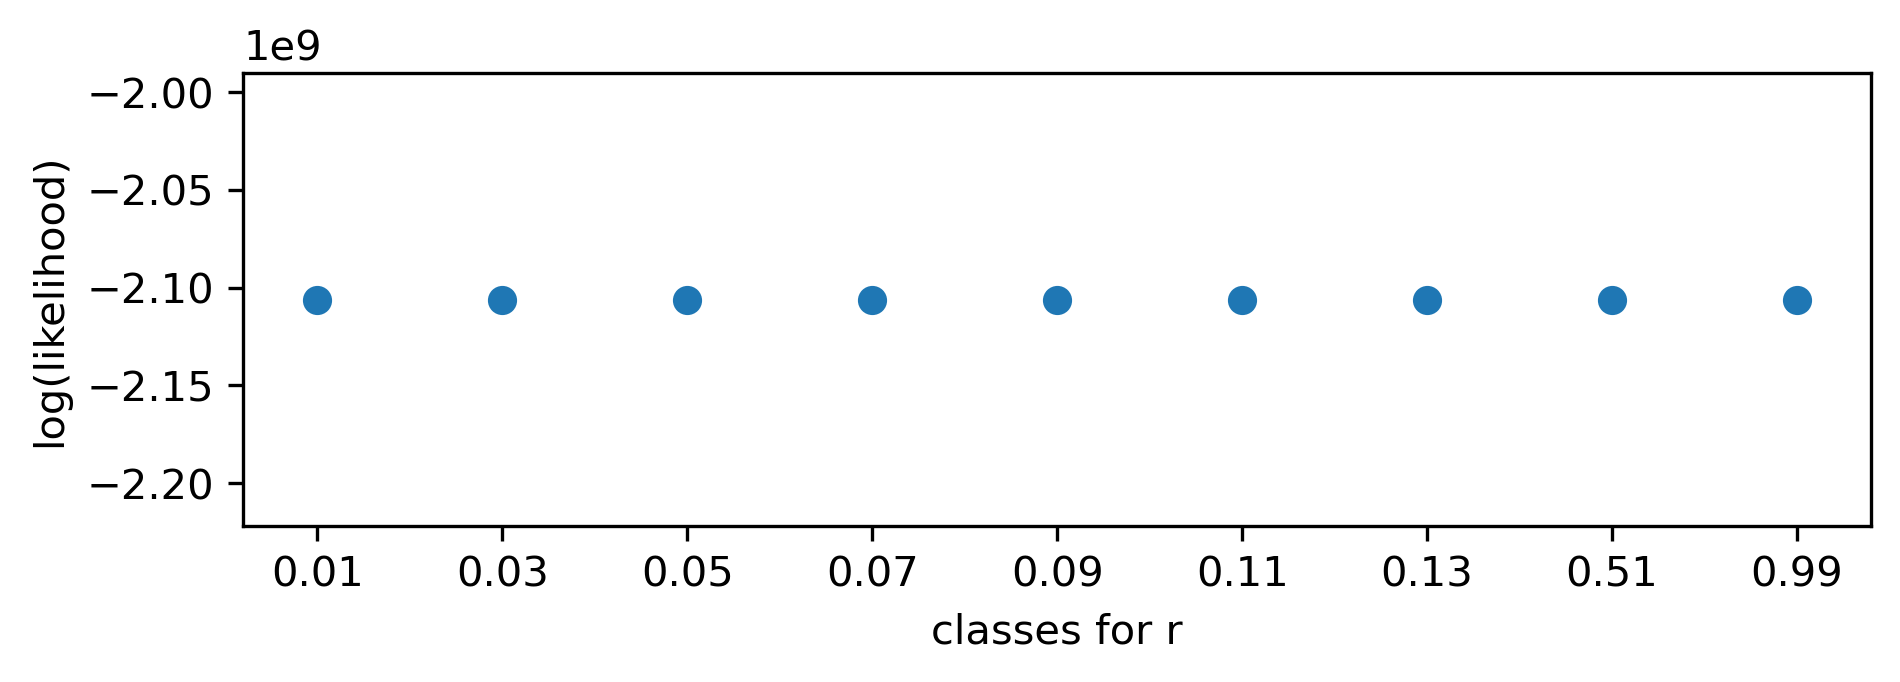

In [124]:
fig, ax = plt.subplots(figsize=(7,2),dpi=300)
ax.scatter(range(9),R_loglikelihood_range[0,:])
plt.xlabel('classes for r')
plt.ylabel('log(likelihood)')
ax.set_xticks(range(9))
# 0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.51, 0.99
# ax.set_xticklabels(['0.01(100)','0.03(33.33)','0.05(20)','0.07-0.09(14-11)','0.11-0.99(9-1)'])
ax.set_xticklabels(['0.01', '0.03', '0.05', '0.07', '0.09', '0.11', '0.13', '0.51', '0.99'])
# plt.yscale('log')

### log verison

In [87]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for r_idx in range(9):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
    f1 = gzip.GzipFile(file_name1, "r")
    x =  np.load(f1)
    
    x[x==0] = 0.00001 ### for log, make the 0 smaller than 0
    log_all = np.log(x)
    
    log_avg_i = np.mean(log_all,axis=0)
    log_avg_i[log_avg_i<0] = 0
    
    variance = (log_avg_i*0.2)**2 + 6
    variance[log_avg_i<=0] = 0.00001 ### if there are zeros, then make it zeros? insteal of 6 maybe try latter
    std_new = np.sqrt(variance)
    
    Inference_mean[r_idx,:] = log_avg_i
    Inference_std[r_idx,:] = std_new
    
    obser_ts = log_all[0,:,:] ## take the log
    obser_ts[obser_ts<0] = 0
    Observation_i[r_idx,:] = obser_ts

0
1
2
3
4
5
6
7
8


In [95]:
def LE(obser, para, std_para):
    loguhflikelihood=0
    for i in range(3142):
        likelihood=SSA.norm.pdf(obser,loc=para[i],scale=std_para[i])
        likelihood[likelihood==0]=0.0000001
        loguhflikelihood+=np.sum(np.log(likelihood))#取对数并求和
    return loguhflikelihood

In [90]:
# R_loglikelihood_range = np.zeros((9,9)) ### different ranges
for i in range(1):
    observed_ts = Observation_i[i]
    for r_idx in range(1,9):
        print(r_idx)
        mean_county_r = Inference_mean[r_idx]
        std_r = Inference_std[r_idx]
    #     std_r_ma = mean_county_r*0.1+1
        R_loglikelihood_range[i,r_idx] = LE(observed_ts,mean_county_r,std_r)

1
2
3
4
5
6
7
8


[Text(0, 0, '0.01'),
 Text(1, 0, '0.03'),
 Text(2, 0, '0.05'),
 Text(3, 0, '0.07'),
 Text(4, 0, '0.09'),
 Text(5, 0, '0.11'),
 Text(6, 0, '0.13'),
 Text(7, 0, '0.51'),
 Text(8, 0, '0.99')]

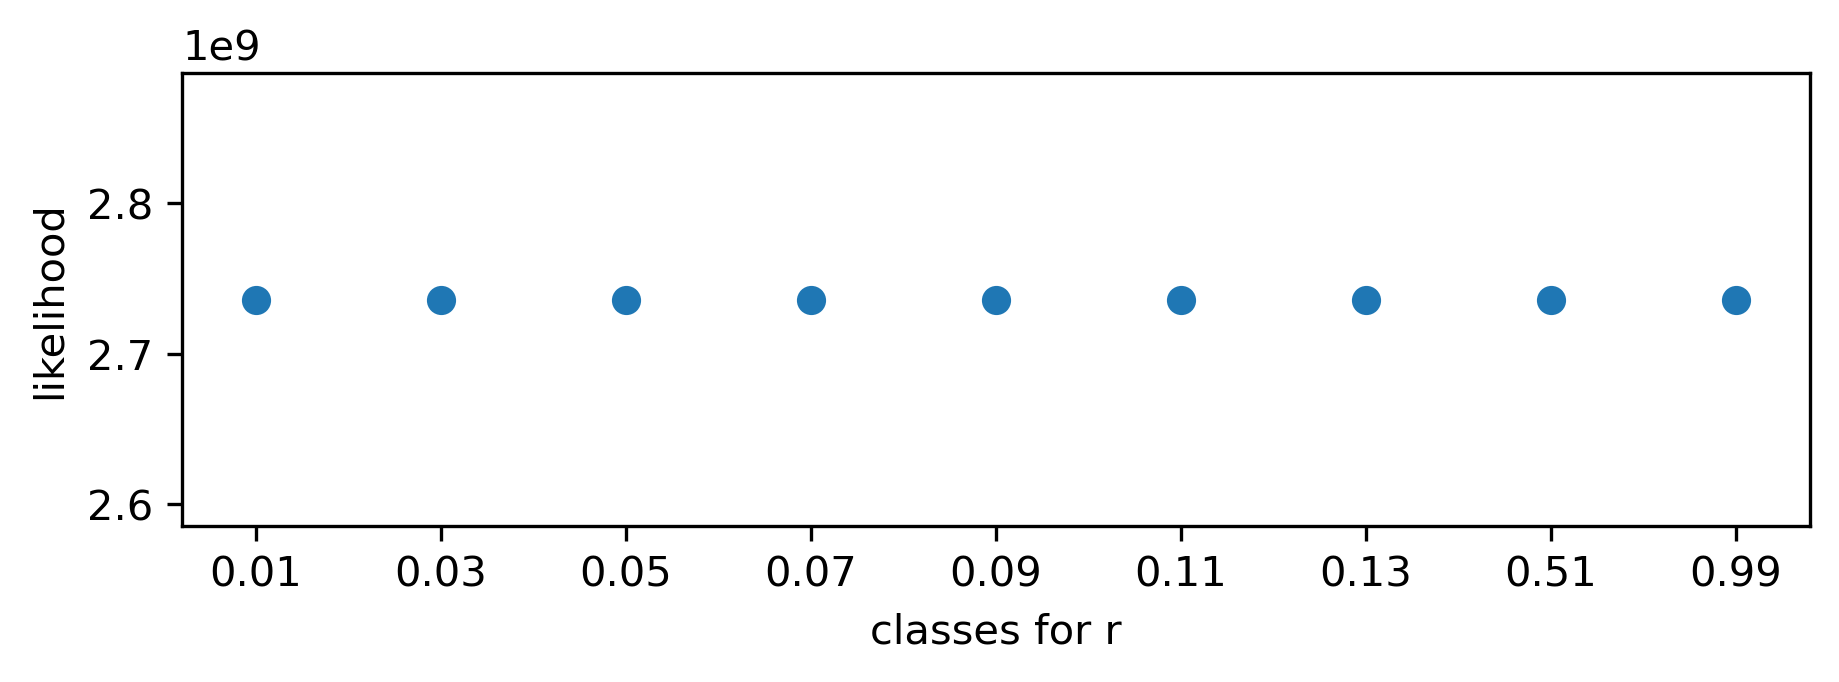

In [92]:
fig, ax = plt.subplots(figsize=(7,2),dpi=300)
ax.scatter(range(9),R_loglikelihood_range[0,:])
plt.xlabel('classes for r')
plt.ylabel('log(likelihood)')
ax.set_xticks(range(9))
# 0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.51, 0.99
# ax.set_xticklabels(['0.01(100)','0.03(33.33)','0.05(20)','0.07-0.09(14-11)','0.11-0.99(9-1)'])
ax.set_xticklabels(['0.01', '0.03', '0.05', '0.07', '0.09', '0.11', '0.13', '0.51', '0.99'])